In [376]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [546]:
df = pd.read_csv("/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/petfood_retail_table.csv")

In [547]:
# Filtering Mars data
mars_df = df[df['MANU_ID'] == 'MARS']
mars_df

,DATE,SHOPPER_ID,SHOPPER_BASKET,STORE_ID,ZIP_CODE,MANU_ID,BRAND_ID,SUB_BRAND_ID,PRODUCT,SPECIES,...,BASE_PRICE,PRICE,PROMO_FLAG,UNITS,PRICE_TIER,PACKAGE_SIZE,FEEDING_PHILOSOPHY,NATURAL_CLAIM,TEXTURE_FORMAT,LIFESTAGE
29,2021-12-10,2857040,2857040A_22583631,84,16673,MARS,SHEBA,SHEBA PERFECT PORTIONS,3465017124,CAT,...,0.99,0.99,0,5,SUPER PREMIUM,SNGL SRV 56.0-100.9G,WET CAT CULINRY RCPS,NON NATURAL,CIG,UNSPECIFIED
31,2021-12-10,2857040,2857040A_22583631,84,16673,MARS,CESAR,CRAVE CORE,3465018486,DOG,...,6.49,4.87,1,1,SUPER PREMIUM,4 - 7.9 LBS,DRY DOG ANCESTRAL,NATURAL,KIBBLE,ADULT
36,2021-12-30,2857040,2857040A_28644969,84,16673,MARS,SHEBA,SHEBA PERFECT PORTIONS,3465016530,CAT,...,0.99,0.99,0,2,SUPER PREMIUM,SNGL SRV 56.0-100.9G,WET CAT CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED
49,2022-02-12,2857040,2857040A_30665111,84,16673,MARS,PEDIGREE,PEDIGREE TNDER BITES SMALL DOG,3465020286,DOG,...,5.99,5.99,0,1,MAINSTREAM,0 - 3.9 LBS,DRY DOG B&B,NON NATURAL,KIBBLE PLS MEAT,ADULT
74,2022-04-30,2857040,2857040A_46636618,84,16673,MARS,PEDIGREE,PEDIGREE TNDER BITES SMALL DOG,3465020286,DOG,...,6.98,6.98,0,1,MAINSTREAM,0 - 3.9 LBS,DRY DOG B&B,NON NATURAL,KIBBLE PLS MEAT,ADULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR FILETS IN GRAVY,3465019812,DOG,...,1.19,1.19,0,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,CIG,UNSPECIFIED
8880,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,PEDIGREE,PEDIGREE CHOICE CUTS,3465004982,DOG,...,17.69,17.69,0,1,MAINSTREAM,CAN LRG 11.0-19.9OZ,WET DOG B&B,NON NATURAL,CIG,ADULT
8881,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR CANINE CUISINE,3465003677,DOG,...,1.19,1.19,0,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED
8883,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR CANINE CUISINE,3465002669,DOG,...,1.19,1.19,0,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED


In [548]:
# Filter for dogs and cats
dog_df = df[df['SPECIES'] == 'DOG']
cat_df = df[df['SPECIES'] == 'CAT']

# Further filter for 'Wet' and 'Dry'
# Replace 'PRODUCT_CONDITION' with the actual column name that specifies the condition
dog_wet_df = dog_df[dog_df['FOOD_TYPE'] == 'Wet']
dog_dry_df = dog_df[dog_df['FOOD_TYPE'] == 'Dry']
cat_wet_df = cat_df[cat_df['FOOD_TYPE'] == 'Wet']
cat_dry_df = cat_df[cat_df['FOOD_TYPE'] == 'Dry']

In [549]:
mars_df['DATE'] = pd.to_datetime(mars_df['DATE'])
mars_df = mars_df.sort_values(by=['SHOPPER_ID', 'DATE'])

/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/14804913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['DATE'] = pd.to_datetime(mars_df['DATE'])


In [620]:
# Calculate the days between orders for each shopper.
mars_df['DAYS_BETWEEN_ORDERS'] = mars_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days

# Calculate the average days between orders where the result is not NaN.
average_days = mars_df.loc[mars_df['DAYS_BETWEEN_ORDERS']!=0, 'DAYS_BETWEEN_ORDERS'].mean()

In [621]:
average_days

49.97355769230769

In [622]:
mars_df['CHURNED'] = mars_df['DAYS_BETWEEN_ORDERS'] > average_days

In [623]:
churned_label = mars_df.groupby('SHOPPER_ID')['CHURNED'].transform('any').astype(int)

# Adding the new 'CHURNED_LABEL' column to the DataFrame
mars_df['CHURNED_LABEL'] = churned_label

In [624]:
# Define a function to label shoppers as 'CHURNED'
def label_churned(sub_df):
    # Calculate days between orders within the subset
    sub_df['DAYS_BETWEEN_ORDERS'] = sub_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days
    # Calculate the average days between orders within this subset
    average_days_sub = sub_df.loc[sub_df['DAYS_BETWEEN_ORDERS']!=0, 'DAYS_BETWEEN_ORDERS'].mean()
    print(average_days_sub)
    # Label as 'CHURNED' if the days between orders is greater than the average
    sub_df['CHURNED'] = sub_df['DAYS_BETWEEN_ORDERS'] > average_days_sub
    # Count the number of 'CHURNED' occurrences for each 'SHOPPER_ID'
    churned_counts = sub_df.groupby('SHOPPER_ID')['CHURNED'].transform('sum')
    # Assign a binary label for 'CHURNED'
    # Only mark as 'CHURNED' if there are 2 or more 'True' values
    sub_df['CHURNED_LABEL'] = (churned_counts >= 2).astype(int)
    return sub_df

# Apply the function to each category
dog_wet_df = label_churned(mars_df[(mars_df['SPECIES'] == 'DOG') & (mars_df['FOOD_TYPE'] == 'WET')])
dog_dry_df = label_churned(mars_df[(mars_df['SPECIES'] == 'DOG') & (mars_df['FOOD_TYPE'] == 'DRY')])
cat_wet_df = label_churned(mars_df[(mars_df['SPECIES'] == 'CAT') & (mars_df['FOOD_TYPE'] == 'WET')])
cat_dry_df = label_churned(mars_df[(mars_df['SPECIES'] == 'CAT') & (mars_df['FOOD_TYPE'] == 'DRY')])


54.083333333333336
48.628865979381445
39.36529680365297
61.85981308411215


/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/819705937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['DAYS_BETWEEN_ORDERS'] = sub_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days
/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/819705937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['CHURNED'] = sub_df['DAYS_BETWEEN_ORDERS'] > average_days_sub
/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/819705937.py:14: SettingWithCopyWarning: 
A

54.083333333333336
48.628865979381445
39.36529680365297
61.85981308411215


/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/3224475440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['DAYS_BETWEEN_ORDERS'] = sub_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days
/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/3224475440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['DAYS_BETWEEN_ORDERS'] = sub_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days
/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/3224475440.py:4: SettingWi

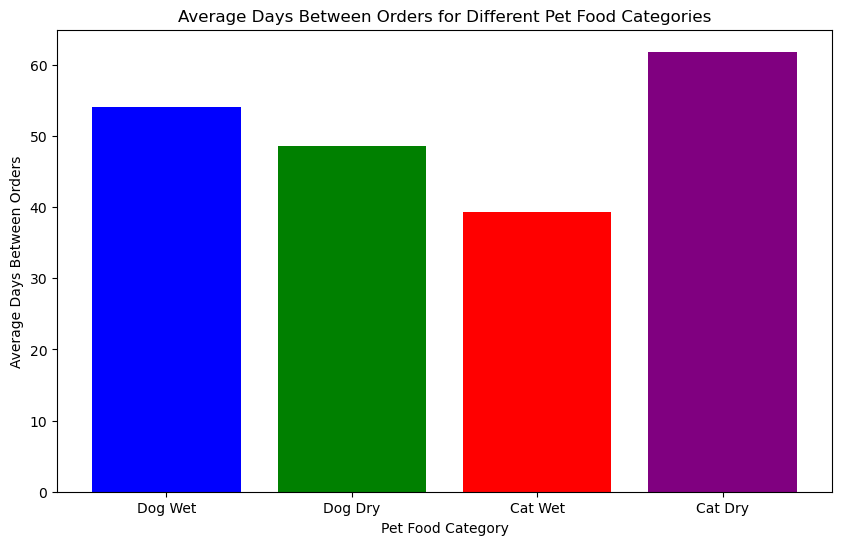

In [626]:
# Data Visualization:
def label_churned(sub_df):
    # Calculate days between orders within the subset
    sub_df['DAYS_BETWEEN_ORDERS'] = sub_df.groupby('SHOPPER_ID')['DATE'].diff().dt.days
    # Calculate the average days between orders within this subset
    average_days_sub = sub_df.loc[sub_df['DAYS_BETWEEN_ORDERS']!=0, 'DAYS_BETWEEN_ORDERS'].mean()
    print(average_days_sub)
    return average_days_sub

# Apply the function to each category
avg_days = {
    'Dog Wet': label_churned(mars_df[(mars_df['SPECIES'] == 'DOG') & (mars_df['FOOD_TYPE'] == 'WET')]),
    'Dog Dry': label_churned(mars_df[(mars_df['SPECIES'] == 'DOG') & (mars_df['FOOD_TYPE'] == 'DRY')]),
    'Cat Wet': label_churned(mars_df[(mars_df['SPECIES'] == 'CAT') & (mars_df['FOOD_TYPE'] == 'WET')]),
    'Cat Dry': label_churned(mars_df[(mars_df['SPECIES'] == 'CAT') & (mars_df['FOOD_TYPE'] == 'DRY')])
}

# Creating a bar graph for different categories of pet food and their average days between orders
plt.figure(figsize=(10, 6))
plt.bar(avg_days.keys(), avg_days.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Average Days Between Orders for Different Pet Food Categories')
plt.xlabel('Pet Food Category')
plt.ylabel('Average Days Between Orders')
plt.show()

In [627]:
dog_wet_df

,DATE,SHOPPER_ID,SHOPPER_BASKET,STORE_ID,ZIP_CODE,MANU_ID,BRAND_ID,SUB_BRAND_ID,PRODUCT,SPECIES,...,UNITS,PRICE_TIER,PACKAGE_SIZE,FEEDING_PHILOSOPHY,NATURAL_CLAIM,TEXTURE_FORMAT,LIFESTAGE,DAYS_BETWEEN_ORDERS,CHURNED,CHURNED_LABEL
83,2022-07-10,2857040,2857040A_44567336,84,16673,MARS,PEDIGREE,PEDIGREE GROUND DINNER,3465017895,DOG,...,1,MAINSTREAM,PCH SML 0-8.9OZ,WET DOG B&B,NON NATURAL,LOAF/PATE,UNSPECIFIED,NaN,False,0
159,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465002108,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,NaN,False,1
160,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR FILETS IN GRAVY,3465019812,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,CIG,UNSPECIFIED,0.0,False,1
161,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465003677,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1
162,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465003678,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR FILETS IN GRAVY,3465019812,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,CIG,UNSPECIFIED,8.0,False,0
8880,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,PEDIGREE,PEDIGREE CHOICE CUTS,3465004982,DOG,...,1,MAINSTREAM,CAN LRG 11.0-19.9OZ,WET DOG B&B,NON NATURAL,CIG,ADULT,0.0,False,0
8881,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR CANINE CUISINE,3465003677,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,0
8883,2022-04-09,2857978,2857978A_13767527,1330,43212,MARS,CESAR,CESAR CANINE CUISINE,3465002669,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,0


In [600]:
dog_wet_df.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/dog_wet.csv', index=False)

In [601]:
combined_df = pd.concat([dog_wet_df, dog_dry_df, cat_wet_df, cat_dry_df])

In [602]:
combined_df.head()

,DATE,SHOPPER_ID,SHOPPER_BASKET,STORE_ID,ZIP_CODE,MANU_ID,BRAND_ID,SUB_BRAND_ID,PRODUCT,SPECIES,...,UNITS,PRICE_TIER,PACKAGE_SIZE,FEEDING_PHILOSOPHY,NATURAL_CLAIM,TEXTURE_FORMAT,LIFESTAGE,DAYS_BETWEEN_ORDERS,CHURNED,CHURNED_LABEL
83,2022-07-10,2857040,2857040A_44567336,84,16673,MARS,PEDIGREE,PEDIGREE GROUND DINNER,3465017895,DOG,...,1,MAINSTREAM,PCH SML 0-8.9OZ,WET DOG B&B,NON NATURAL,LOAF/PATE,UNSPECIFIED,NaN,False,0
159,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465002108,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,NaN,False,1
160,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR FILETS IN GRAVY,3465019812,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,CIG,UNSPECIFIED,0.0,False,1
161,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465003677,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1
162,2019-08-31,2857052,2857052A_27334137,97,16001,MARS,CESAR,CESAR CANINE CUISINE,3465003678,DOG,...,1,PREMIUM,TRAY/TUB SML (0-4.9OZ),WET DOG CULINRY RCPS,NON NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1


In [603]:
combined_df.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/combined.csv', index=False)

In [604]:
# Keep the original 'DATE' column and also create 'PURCHASING_QUARTER' column
combined_df['PURCHASING_QUARTER'] = combined_df['DATE'].dt.to_period('Q')

# Group by 'SHOPPER_BASKET', 'PURCHASING_QUARTER', and 'BRAND_ID', sum 'UNITS', and keep the first value for other columns
# Here, we ensure that the 'DATE' column is not dropped
grouped_df = combined_df.groupby(['SHOPPER_BASKET', 'PURCHASING_QUARTER', 'BRAND_ID']).agg({
    'UNITS': 'sum',
    **{col: 'first' for col in combined_df.columns.drop(['SHOPPER_BASKET', 'PURCHASING_QUARTER', 'BRAND_ID', 'UNITS'])}
}).reset_index()

# Sort the DataFrame by 'SHOPPER_ID'
grouped_df = grouped_df.sort_values(['SHOPPER_ID'], ascending=[True])

# Convert 'PURCHASING_QUARTER' back to string format
grouped_df['PURCHASING_QUARTER'] = grouped_df['PURCHASING_QUARTER'].astype(str)


In [605]:
grouped_df.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/sorted.csv', index=False)

In [606]:
# First feature 
# Number of brands in total for each shopper
# Ensure 'DATE' is a datetime object and create a 'QUARTER' column
grouped_df['DATE'] = pd.to_datetime(grouped_df['DATE'])
grouped_df['QUARTER'] = grouped_df['DATE'].dt.to_period('Q')

grouped_df['total_brands_purchased'] = grouped_df.groupby('SHOPPER_ID')['BRAND_ID'].transform('nunique')

# Second feature
# Number of brands changes for each shopper

# Sort the DataFrame by SHOPPER_ID and DATE (or QUARTER)
grouped_df.sort_values(by=['SHOPPER_ID', 'DATE'], inplace=True)

# Function to calculate brand changes for each shopper
def calculate_brand_changes_per_shopper(sub_df):
    # Create a shifted column to compare with the current brand
    sub_df['PREV_BRAND_ID'] = sub_df['BRAND_ID'].shift()
    
    # Compare the current brand with the previous brand, mark 1 if changed
    sub_df['BRAND_CHANGED'] = sub_df['BRAND_ID'].ne(sub_df['PREV_BRAND_ID']).astype(int)
    
    # Cumulatively sum the changes over time for each shopper
    sub_df['total_brand_changes'] = sub_df['BRAND_CHANGED'].cumsum()
    
    return sub_df

# Apply the function to each shopper
grouped_df = grouped_df.groupby('SHOPPER_ID').apply(calculate_brand_changes_per_shopper)

# Remove the temporary 'PREV_BRAND_ID' and 'BRAND_CHANGED' columns
grouped_df.drop(['PREV_BRAND_ID', 'BRAND_CHANGED'], axis=1, inplace=True)

# Third Feature
# Number of brands each quarter for each shopper

# Group by 'SHOPPER_ID' and 'QUARTER' and count the number of unique brands
total_brands_per_quarter = grouped_df.groupby(['SHOPPER_ID', 'QUARTER'])['BRAND_ID'].nunique()

# Merge this count back into the original DataFrame
grouped_df = grouped_df.merge(total_brands_per_quarter, on=['SHOPPER_ID', 'QUARTER'], how='left', suffixes=('', '_total_brands'))

# Rename the new column for clarity
grouped_df.rename(columns={'BRAND_ID_total_brands': 'total_brands_this_quarter'}, inplace=True)



/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_4078/2247060452.py:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_df = grouped_df.groupby('SHOPPER_ID').apply(calculate_brand_changes_per_shopper)


In [607]:
# Grouping by 'PURCHASING_QUARTER' first, then by 'BRAND_ID' within each quarter
grouped_by_quarter_and_brand = sorted_data.groupby(['PURCHASING_QUARTER', 'BRAND_ID'])

# Creating a new DataFrame to hold the grouped data
grouped_quarter_brand_data = pd.DataFrame()

for (quarter, brand), group in grouped_by_quarter_and_brand:
    grouped_quarter_brand_data = pd.concat([grouped_quarter_brand_data, group])

# Display the first few rows of the re-grouped dataset
grouped_quarter_brand_data.head()

,SHOPPER_BASKET,PURCHASING_QUARTER,BRAND_ID,UNITS,DATE,SHOPPER_ID,STORE_ID,ZIP_CODE,MANU_ID,SUB_BRAND_ID,...,NATURAL_CLAIM,TEXTURE_FORMAT,LIFESTAGE,DAYS_BETWEEN_ORDERS,CHURNED,CHURNED_LABEL,QUARTER,total_brands_purchased,total_brand_changes,total_brands_this_quarter
439,2857568A_11654356,2019Q3,CESAR,3,2019-07-19,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1,2019Q3,2,1,2
442,2857568A_32896815,2019Q3,CESAR,4,2019-07-26,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,7.0,False,1,2019Q3,2,3,2
176,2857194A_38656352,2019Q3,CESAR,30,2019-08-02,2857194,323,44077,MARS,CESAR HOME DELIGHTS,...,NON NATURAL,CIG,UNSPECIFIED,30.0,False,1,2019Q3,2,3,2
174,2857194A_24522564,2019Q3,CESAR,30,2019-07-03,2857194,323,44077,MARS,CESAR FILETS IN GRAVY,...,NON NATURAL,CIG,UNSPECIFIED,0.0,False,1,2019Q3,2,1,2
444,2857568A_42612561,2019Q3,CESAR,4,2019-08-04,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1,2019Q3,2,5,2


In [608]:
 grouped_quarter_brand_data.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/before_encoding.csv', index=False)

In [609]:
# Group the data by SHOPPER_ID and compute the median DAYS_BETWEEN_ORDERS for each shopper
median_days_per_shopper = grouped_quarter_brand_data.groupby('SHOPPER_ID')['DAYS_BETWEEN_ORDERS'].median()

# Function to apply the imputation
def impute_median(row):
    if pd.isna(row['DAYS_BETWEEN_ORDERS']):
        return median_days_per_shopper[row['SHOPPER_ID']]
    else:
        return row['DAYS_BETWEEN_ORDERS']

# Apply the function to the DataFrame
grouped_quarter_brand_data['DAYS_BETWEEN_ORDERS'] = grouped_quarter_brand_data.apply(impute_median, axis=1)
grouped_quarter_brand_data['DAYS_BETWEEN_ORDERS'].fillna(0, inplace=True)


In [610]:
grouped_quarter_brand_data

,SHOPPER_BASKET,PURCHASING_QUARTER,BRAND_ID,UNITS,DATE,SHOPPER_ID,STORE_ID,ZIP_CODE,MANU_ID,SUB_BRAND_ID,...,NATURAL_CLAIM,TEXTURE_FORMAT,LIFESTAGE,DAYS_BETWEEN_ORDERS,CHURNED,CHURNED_LABEL,QUARTER,total_brands_purchased,total_brand_changes,total_brands_this_quarter
439,2857568A_11654356,2019Q3,CESAR,3,2019-07-19,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1,2019Q3,2,1,2
442,2857568A_32896815,2019Q3,CESAR,4,2019-07-26,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,7.0,False,1,2019Q3,2,3,2
176,2857194A_38656352,2019Q3,CESAR,30,2019-08-02,2857194,323,44077,MARS,CESAR HOME DELIGHTS,...,NON NATURAL,CIG,UNSPECIFIED,30.0,False,1,2019Q3,2,3,2
174,2857194A_24522564,2019Q3,CESAR,30,2019-07-03,2857194,323,44077,MARS,CESAR FILETS IN GRAVY,...,NON NATURAL,CIG,UNSPECIFIED,0.0,False,1,2019Q3,2,1,2
444,2857568A_42612561,2019Q3,CESAR,4,2019-08-04,2857568,396,44087,MARS,CRAVE CORE,...,NATURAL,LOAF/PATE,UNSPECIFIED,0.0,False,1,2019Q3,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2857917A_48683824,2022Q4,SHEBA,3,2022-11-01,2857917,19,15236,MARS,SHEBA PERFECT PORTIONS,...,NON NATURAL,LOAF/PATE,UNSPECIFIED,83.0,True,1,2022Q4,2,2,1
775,2857917A_45591270,2022Q4,SHEBA,2,2022-12-30,2857917,19,15236,MARS,SHEBA PERFECT PORTIONS,...,NON NATURAL,LOAF/PATE,UNSPECIFIED,59.0,True,1,2022Q4,2,2,1
587,2857769A_19229381,2022Q4,SHEBA,1,2022-10-20,2857769,2389,44646,MARS,SHEBA PERFECT PORTIONS,...,NON NATURAL,LOAF/PATE,UNSPECIFIED,418.0,True,0,2022Q4,3,6,1
631,2857779A_47800771,2022Q4,SHEBA,1,2022-12-01,2857779,210,44483,MARS,SHEBA PERFECT PORTIONS,...,NON NATURAL,LOAF/PATE,UNSPECIFIED,32.0,False,0,2022Q4,2,2,2


In [611]:
 grouped_quarter_brand_data.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/sorted.csv', index=False)

In [612]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [613]:
# Encoding categorical variables if needed
label_encoder = LabelEncoder()
grouped_quarter_brand_data['BRAND_ID'] = label_encoder.fit_transform(grouped_quarter_brand_data['BRAND_ID'])
grouped_quarter_brand_data['SUB_BRAND_ID'] = label_encoder.fit_transform(grouped_quarter_brand_data['SUB_BRAND_ID'])
grouped_quarter_brand_data['SPECIES'] = label_encoder.fit_transform(grouped_quarter_brand_data['SPECIES'])
grouped_quarter_brand_data['FOOD_TYPE'] = label_encoder.fit_transform(grouped_quarter_brand_data['FOOD_TYPE'])
grouped_quarter_brand_data['FEEDING_PHILOSOPHY'] = label_encoder.fit_transform(grouped_quarter_brand_data['FEEDING_PHILOSOPHY'])
grouped_quarter_brand_data['NATURAL_CLAIM'] = label_encoder.fit_transform(grouped_quarter_brand_data['NATURAL_CLAIM'])
grouped_quarter_brand_data['TEXTURE_FORMAT'] = label_encoder.fit_transform(grouped_quarter_brand_data['TEXTURE_FORMAT'])
grouped_quarter_brand_data['QUARTER'] = label_encoder.fit_transform(grouped_quarter_brand_data['QUARTER'])


grouped_quarter_brand_data.drop('DATE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('ZIP_CODE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('PURCHASING_QUARTER', axis=1, inplace=True)
grouped_quarter_brand_data.drop('SHOPPER_BASKET', axis=1, inplace=True)
grouped_quarter_brand_data.drop('MANU_ID', axis=1, inplace=True)
grouped_quarter_brand_data.drop('PRICE_TIER', axis=1, inplace=True)
grouped_quarter_brand_data.drop('PACKAGE_SIZE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('CHURNED', axis=1, inplace=True)
grouped_quarter_brand_data.drop('PROMO_FLAG', axis=1, inplace=True)
grouped_quarter_brand_data.drop('LIFESTAGE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('STORE_ID', axis=1, inplace=True)
grouped_quarter_brand_data.drop('BASE_PRICE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('TEXTURE_FORMAT', axis=1, inplace=True)
grouped_quarter_brand_data.drop('FEEDING_PHILOSOPHY', axis=1, inplace=True)
grouped_quarter_brand_data.drop('NATURAL_CLAIM', axis=1, inplace=True)
grouped_quarter_brand_data.drop('PRICE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('SPECIES', axis=1, inplace=True)
grouped_quarter_brand_data.drop('FOOD_TYPE', axis=1, inplace=True)
grouped_quarter_brand_data.drop('SUB_BRAND_ID', axis=1, inplace=True)


grouped_quarter_brand_data.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/sorted.csv', index=False)

In [614]:
# Define your features and target variable
# Split the data based on the 'QUARTER' column
train_data = grouped_quarter_brand_data[grouped_quarter_brand_data['QUARTER'].between(0, 10)]
test_data = grouped_quarter_brand_data[grouped_quarter_brand_data['QUARTER'].between(11, 13)]

# Define the features and target variable
X_train = train_data.drop('CHURNED_LABEL', axis=1)
y_train = train_data['CHURNED_LABEL']
X_test = test_data.drop('CHURNED_LABEL', axis=1)
y_test = test_data['CHURNED_LABEL']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8609865470852018
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        83
           1       0.85      0.95      0.90       140

    accuracy                           0.86       223
   macro avg       0.87      0.83      0.84       223
weighted avg       0.86      0.86      0.86       223



                           importance
SHOPPER_ID                   0.333582
DAYS_BETWEEN_ORDERS          0.194342
PRODUCT                      0.166003
total_brand_changes          0.081302
QUARTER                      0.058846
total_brands_purchased       0.050594
BRAND_ID                     0.049407
UNITS                        0.041769
total_brands_this_quarter    0.024155


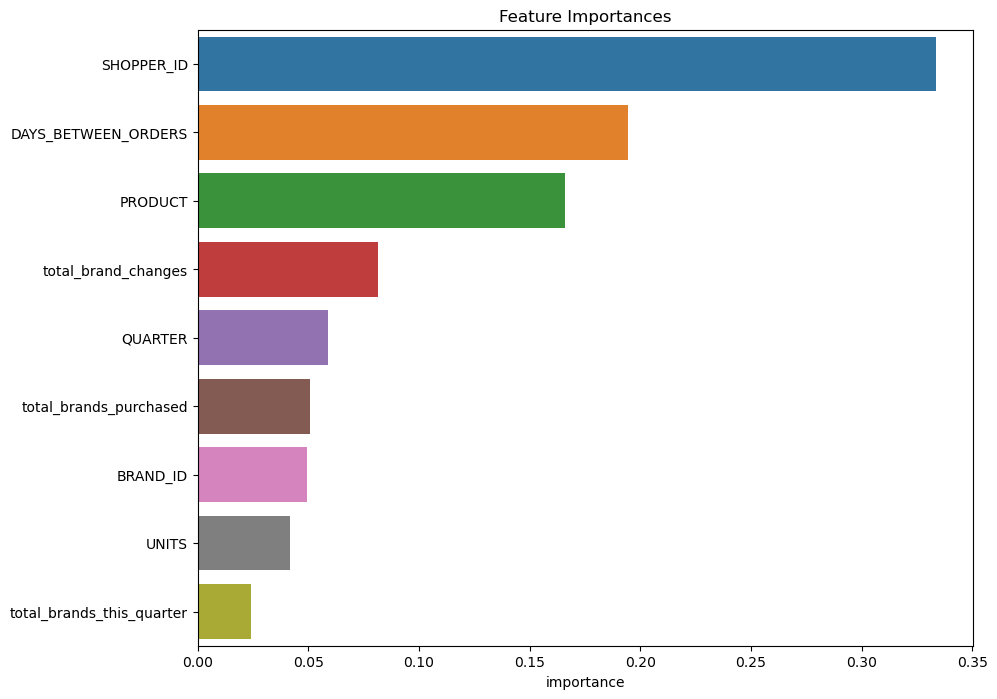

In [615]:
# Extract feature importances from the model
importances = rf.feature_importances_

# Map these importances to the corresponding feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importances))

# Convert to a DataFrame for easier visualization
feature_importance_df = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['importance']).sort_values(by='importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plotting the feature importances for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df.importance, y=feature_importance_df.index)
plt.title('Feature Importances')
plt.show()

In [616]:
# Prediction
prediction_data = pd.read_csv("/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/prediction2.csv")

In [617]:
prediction_data['QUARTER'] = label_encoder.fit_transform(prediction_data['QUARTER'])

X_predict = prediction_data.drop('CHURNED_LABEL', axis=1)

y_pred = rf.predict(X_predict)
prediction_data['Predicted_CHURN_LABEL'] = y_pred
prediction_data.to_csv('/Users/georgelyu/Desktop/DSI/Mars Petcare Capstone/OUTPUT.csv', index=False)


In [618]:
# Assuming 'prediction_data' is the same as 'data' that we loaded earlier
# Grouping the data by BRAND_ID and calculating the mean of Predicted_CHURN_LABEL for each brand
brand_churn_likelihood = prediction_data.groupby('BRAND_ID')['Predicted_CHURN_LABEL'].mean()

# Sorting the brands based on churn likelihood
sorted_brand_churn_likelihood = brand_churn_likelihood.sort_values()

# Displaying the churn likelihood for each brand, sorted
sorted_brand_churn_likelihood

BRAND_ID
2    0.000000
3    0.441379
0    0.613027
1    0.778689
4    0.870130
5    1.000000
Name: Predicted_CHURN_LABEL, dtype: float64